![image.png](attachment:image.png)

# Tarefa

Carregue a base ```NFP.ftr```. Essa base é proveniente do projeto #AMABiliDados, e contém dados da nota fiscal paulista cadastrados para doação automática para a AMA, Associação de Amigos do Autista.

A *Nota Fiscal Paulista* é um programa de incentivo do governo do estado de São Paulo, que retorna um pedacinho do ICMS ao consumidor sempre que solicita o registro do seu CPF na nota. Nesse programa, o contribuinte pode direcionar seus créditos a uma ONG, e quando faz isso, sempre que faz esse consumidor cadastrado faz uma compra, os créditos de notas emitidas pelo mesmo estabelecimento não identificadas (notas sem CPF) são "arrastados" para a ONG na forma de uma doação.

Clique no link, caso queira saber mais sobre a [AMA](https://www.ama.org.br/site/).<br>
Clique no link, caso queira saber como o cidadão pode ser um [doador da NFP](https://doacao1.ama.org.br/sitenfp).

Essa base possui dados das notas cujos contribuintes direcionaram seus créditos à AMA. Seus campos estão descritos abaixo:

|Campo|Descrição|
|:-|:-|
|CNPJ emit.| CNPJ do emitente da nota|
|Emitente| Nome fantasia do emitente da nota|
|No.| Número da nota fiscal|
|Data Emissão| Data de emissão da nota fiscal|
|Valor NF| Valor da nota fiscal|
|Data Registro| Data de registro no sistema da NFP|
|Créditos| Valor dos créditos (doação)|
|Situação do Crédito| Se o crédito já foi pago, está sendo processado etc.|
|Ano| Ano da emissão da nota|
|Semestre| Semestre da emissão da nota|
|Retorno| Valor do crédito dividido pelo valor da nota|
|flag_credito| Indicadora se a nota possui crédito positivo|
|categoria| Categorização da nota |

**OBJETIVO:** Algumas notas não dão retorno, o que pode ocorrer por diversos motivos, um deles seria a ocorrência de produtos não incentivados como cigarros e bebidas alcólicas. O nosso objetivo é tentar prever que tipo de nota tem maior ou menor propensão a fornecer créditos.

**Observação**: Esta é uma base real, havendo características de acordo. Pode haver uma variabilidade difícil de explicar, em parte por causa de uma freqüência de notas inconstante no tempo (por diversos motivos), em parte por haverem informações importantes, protegidas pela LGPD, não constantes na base, que pode interferir no crédito gerado, o que vai ocasionar uma variabilidade difícil de se explicar. *Welcome to the jungle*, A vida real é assim :)

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_pickle('base_nfp.pkl')
df.head()

,CNPJ emit.,Emitente,No.,Data Emissão,Valor NF,Data Registro,Créditos,Situação do Crédito,Ano,Semestre,Retorno,flag_credito,categoria
0,03.476.811/0741-98,DIA BRASIL SOCIEDADE LIMITADA,537,2017-06-30,24.68,2017-06-30,0.00,Liberado,2017,1,0.000000,0,Mercado
1,43.101.310/0001-05,AUTO POSTO ZANWAL LTDA EPP,2894,2017-06-30,50.00,2017-06-30,0.00,Liberado,2017,1,0.000000,0,Auto posto
2,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,699,2017-06-30,27.00,2017-06-30,0.44,Liberado,2017,1,0.016296,1,Restaurantes
3,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,698,2017-06-30,111.50,2017-06-30,1.81,Liberado,2017,1,0.016233,1,Restaurantes
4,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,694,2017-06-30,125.00,2017-06-30,2.03,Liberado,2017,1,0.016240,1,Restaurantes


## Análise da probabilidade de retorno

Considere somente os dados de janeiro de 2020 em diante para esta análise.

- Analise a proporção de notas que tiveram retorno>0 por categoria de estabelecimento. Esta análise pode ser por tabela ou gráfico.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187646 entries, 0 to 187645
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   CNPJ emit.           187646 non-null  object        
 1   Emitente             187646 non-null  object        
 2   No.                  187646 non-null  int64         
 3   Data Emissão         187646 non-null  datetime64[ns]
 4   Valor NF             187646 non-null  float64       
 5   Data Registro        187646 non-null  datetime64[ns]
 6   Créditos             187646 non-null  float64       
 7   Situação do Crédito  187646 non-null  category      
 8   Ano                  187646 non-null  int64         
 9   Semestre             187646 non-null  int64         
 10  Retorno              186666 non-null  float64       
 11  flag_credito         187646 non-null  int64         
 12  categoria            187646 non-null  object        
dtypes: category(1)

In [ ]:
# Filtrando os dados maiores que janeiro de 2020
df = df[df['Data Emissão'] >= '2020-01-01']

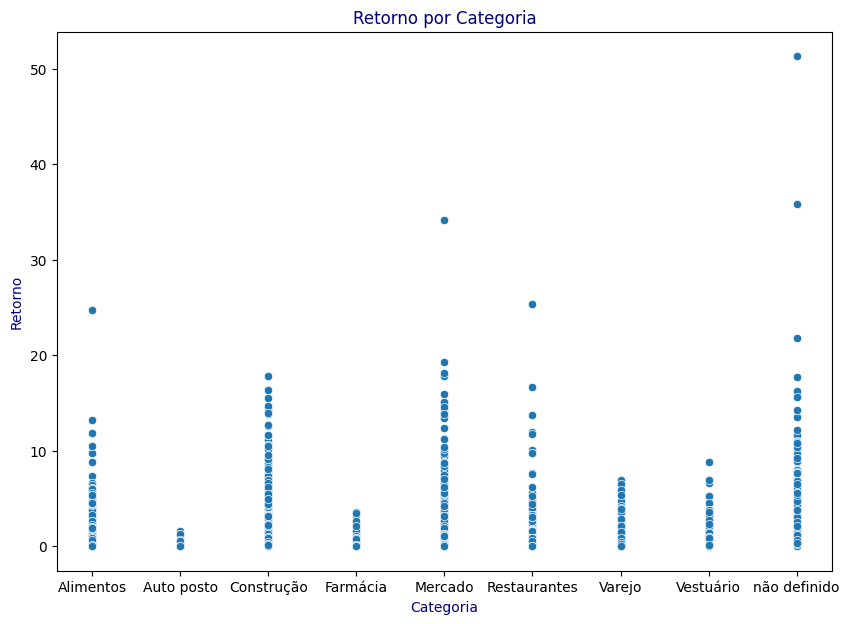

In [ ]:
# Criando um scatterplot com os dados de retorno por categoria

# 0: A nota fiscal não gerou crédito.
# 1: A nota fiscal gerou crédito.

# Ordenar os dados pela coluna 'categoria' em ordem alfabética
df_sorted = df[(df['Retorno'] > 0) & (df['Retorno'] < 200)].sort_values(by='categoria')

# Plotar o gráfico de dispersão
fig, ax = plt.subplots(figsize=(10, 7))
sns.scatterplot(ax=ax, data=df_sorted, x='categoria', y='Retorno')
ax.set_title('Retorno por Categoria', color='navy')
ax.set_xlabel('Categoria', color='navy')
ax.set_ylabel('Retorno', color='navy')
plt.show()

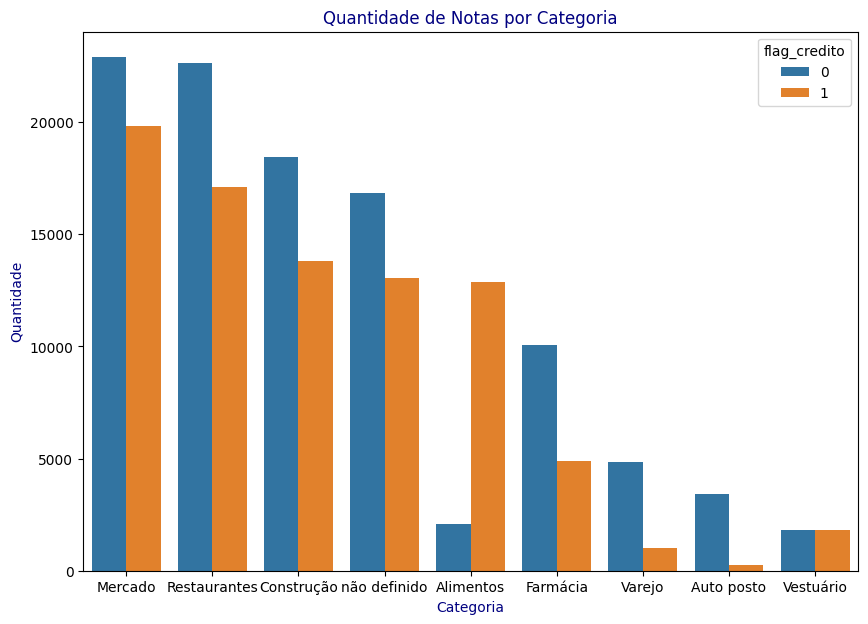

In [ ]:
# Criando um countplot com a quantidade de notas por categoria e se houve retorno

# Ordenando os valores
categorias_ordenadas = df['categoria'].value_counts().index.tolist()

# Plotar o gráfico de barras
fig, ax = plt.subplots(figsize=(10, 7))
sns.countplot(ax=ax, data=df, x='categoria', hue='flag_credito', order=categorias_ordenadas)
ax.set_title('Quantidade de Notas por Categoria', color='navy')
ax.set_xlabel('Categoria', color='navy')
ax.set_ylabel('Quantidade', color='navy')
plt.show()


## Cálculo do WOE

- Calcule o WOE das categorias, sendo que o evento em questão é a nota ter retorno>0.
- Analise este WOE por tabela e por gráfico.

In [ ]:
# Criando uma nova coluna para indicar se houve retorno
df['Retorno Positivo'] = df['Retorno'] > 0

# Calculando a proporção de eventos positivos e negativos por categoria
proporcao_positivos = df.groupby('categoria')['Retorno Positivo'].mean()
proporcao_negativos = 1 - proporcao_positivos

# Calculando o WOE para cada categoria
woe = np.log(proporcao_positivos / proporcao_negativos)

# Exibindo o WOE em uma tabela
print(woe.sort_values())

categoria
Auto posto     -2.534692
Varejo         -1.548487
Farmácia       -0.721597
Construção     -0.288243
Restaurantes   -0.279190
não definido   -0.254334
Mercado        -0.144483
Vestuário      -0.007752
Alimentos       1.816623
Name: Retorno Positivo, dtype: float64


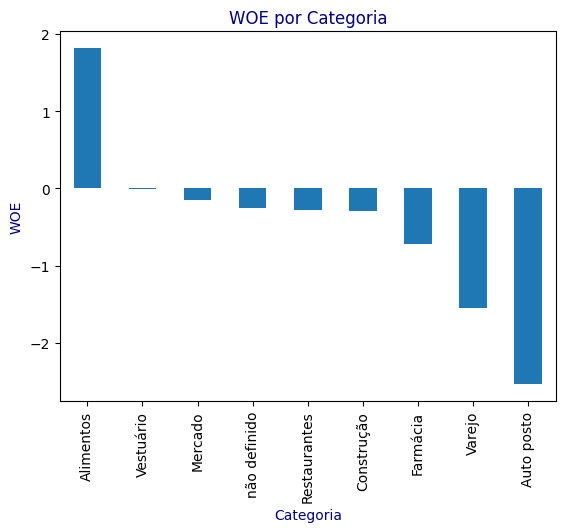

In [ ]:
# Exibindo o WOE em um gráfico de barras
woe = woe.sort_values(ascending=False)
woe.plot(kind='bar')
plt.ylabel('WOE', color = 'navy')
plt.xlabel('Categoria', color = 'navy')
plt.title('WOE por Categoria', color='navy')
plt.show()

## Cálculo do *Information Value*

Calcule o *IV* dessa variável.

In [ ]:
# Calculando a proporção de eventos positivos e negativos por categoria
proporcao_positivos = df.groupby('categoria')['Retorno Positivo'].mean()
proporcao_negativos = 1 - proporcao_positivos

# Calculando o WOE para cada categoria
woe = np.log(proporcao_positivos / proporcao_negativos)

# Calculando a diferença entre a proporção de eventos positivos e negativos
diff = proporcao_positivos - proporcao_negativos

# Calculando o IV
iv = np.sum(diff * woe)

print('Information Value:', iv)

Information Value: 4.848621712774972


## Conclua

Não se esqueça de registrar suas conclusões em uma célula de texto. <font color='red'>**Sugestão:**</font> tente alterar a cor da fonte nesta célula para diferenciá-la das demais.


<div style="background-color: lightgreen; color: black; padding: 10px;">

> A medida WOE diz se a característica de uma característica é preditiva ou não, no caso de estudo, temos que a categoria com maior probabilidade de retorno maior que zero são de **Alimentos** e os casos menos prováveis são os **Auto postos**

> Já para o information Value (IV), que nos diz o quão útil é uma variável para prever o evento, temos que a variável tem uma capacidade preditiva forte, isso levando em consideração a orientação geral de interpretação de valores que segue abaixo:
- < 0.02: A variável tem pouca ou nenhuma capacidade preditiva.
- 0.02 - 0.1: A variável tem uma capacidade preditiva fraca.
- 0.1 - 0.3: A variável tem uma capacidade preditiva média.
- 0.3 - 0.5: A variável tem uma capacidade preditiva forte.
- \> 0.5: A variável tem uma capacidade preditiva muito forte.

</div>